# Infernce Review

## About

- Review loading model / tokenizer
- Review loading dataset
- Sample prediction

## Import

In [1]:
import pathlib
import sklearn
import datasets
import pandas as pd
import torch

import numpy as np
import transformers
import os
import json
from ts.utils.util  import map_class_to_label
from tqdm import tqdm, trange
import time
import torchviz
import torch.nn as nn


## Load model/tokenizer artifact

In [2]:
model_dir ='../artifacts/model/distilbert-base-uncased/'

load model

In [3]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(model_dir)

In [4]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [5]:
model.config

DistilBertConfig {
  "_name_or_path": "../artifacts/model/distilbert-base-uncased/",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "ACCESSORY",
    "1": "BOOT",
    "2": "CELLULAR_PHONE_CASE",
    "3": "CHAIR",
    "4": "EARRING",
    "5": "FINEEARRING",
    "6": "FINENECKLACEBRACELETANKLET",
    "7": "FINERING",
    "8": "GROCERY",
    "9": "HANDBAG",
    "10": "HARDWARE_HANDLE",
    "11": "HAT",
    "12": "HEALTH_PERSONAL_CARE",
    "13": "HOME",
    "14": "HOME_BED_AND_BATH",
    "15": "HOME_FURNITURE_AND_DECOR",
    "16": "JANITORIAL_SUPPLY",
    "17": "KITCHEN",
    "18": "LAMP",
    "19": "LIGHT_BULB",
    "20": "LIGHT_FIXTURE",
    "21": "OFFICE_PRODUCTS",
    "22": "OUTDOOR_LIVING",
    "23": "PET_SUPPLIES",
    "24": "RUG",
    "25": "SANDAL",
    "26": "SHOES",
    "27": "SOFA",
    "28": "SPORTING_GOODS",
    "29": "TABLE",


model label name to id and id->label name mapping is stord as part of model artifact

In [6]:
labels = model.config.label2id
labels

{'ACCESSORY': 0,
 'BOOT': 1,
 'CELLULAR_PHONE_CASE': 2,
 'CHAIR': 3,
 'EARRING': 4,
 'FINEEARRING': 5,
 'FINENECKLACEBRACELETANKLET': 6,
 'FINERING': 7,
 'GROCERY': 8,
 'HANDBAG': 9,
 'HARDWARE_HANDLE': 10,
 'HAT': 11,
 'HEALTH_PERSONAL_CARE': 12,
 'HOME': 13,
 'HOME_BED_AND_BATH': 14,
 'HOME_FURNITURE_AND_DECOR': 15,
 'JANITORIAL_SUPPLY': 16,
 'KITCHEN': 17,
 'LAMP': 18,
 'LIGHT_BULB': 19,
 'LIGHT_FIXTURE': 20,
 'OFFICE_PRODUCTS': 21,
 'OUTDOOR_LIVING': 22,
 'PET_SUPPLIES': 23,
 'RUG': 24,
 'SANDAL': 25,
 'SHOES': 26,
 'SOFA': 27,
 'SPORTING_GOODS': 28,
 'TABLE': 29,
 'WALL_ART': 30}

In [7]:
id2label = model.config.id2label

In [8]:
id2label

{0: 'ACCESSORY',
 1: 'BOOT',
 2: 'CELLULAR_PHONE_CASE',
 3: 'CHAIR',
 4: 'EARRING',
 5: 'FINEEARRING',
 6: 'FINENECKLACEBRACELETANKLET',
 7: 'FINERING',
 8: 'GROCERY',
 9: 'HANDBAG',
 10: 'HARDWARE_HANDLE',
 11: 'HAT',
 12: 'HEALTH_PERSONAL_CARE',
 13: 'HOME',
 14: 'HOME_BED_AND_BATH',
 15: 'HOME_FURNITURE_AND_DECOR',
 16: 'JANITORIAL_SUPPLY',
 17: 'KITCHEN',
 18: 'LAMP',
 19: 'LIGHT_BULB',
 20: 'LIGHT_FIXTURE',
 21: 'OFFICE_PRODUCTS',
 22: 'OUTDOOR_LIVING',
 23: 'PET_SUPPLIES',
 24: 'RUG',
 25: 'SANDAL',
 26: 'SHOES',
 27: 'SOFA',
 28: 'SPORTING_GOODS',
 29: 'TABLE',
 30: 'WALL_ART'}

a utiliy method provided by torchserver requires labels to also be strings

In [9]:
id2label_str = {str(key): value for key, value in id2label.items()}
id2label_str

{'0': 'ACCESSORY',
 '1': 'BOOT',
 '2': 'CELLULAR_PHONE_CASE',
 '3': 'CHAIR',
 '4': 'EARRING',
 '5': 'FINEEARRING',
 '6': 'FINENECKLACEBRACELETANKLET',
 '7': 'FINERING',
 '8': 'GROCERY',
 '9': 'HANDBAG',
 '10': 'HARDWARE_HANDLE',
 '11': 'HAT',
 '12': 'HEALTH_PERSONAL_CARE',
 '13': 'HOME',
 '14': 'HOME_BED_AND_BATH',
 '15': 'HOME_FURNITURE_AND_DECOR',
 '16': 'JANITORIAL_SUPPLY',
 '17': 'KITCHEN',
 '18': 'LAMP',
 '19': 'LIGHT_BULB',
 '20': 'LIGHT_FIXTURE',
 '21': 'OFFICE_PRODUCTS',
 '22': 'OUTDOOR_LIVING',
 '23': 'PET_SUPPLIES',
 '24': 'RUG',
 '25': 'SANDAL',
 '26': 'SHOES',
 '27': 'SOFA',
 '28': 'SPORTING_GOODS',
 '29': 'TABLE',
 '30': 'WALL_ART'}

load tokenizer

In [10]:
tokenizer = transformers.AutoTokenizer.from_pretrained(
                model_dir
            )

use gpu if available

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


## Test Prediction

query we are predicting on

In [12]:
query = 'men shoes for work'
query  = "men vitamins"
query  = "herbal TEA"
query = " cheap professional men shoes"

get input and attention mask from the tokenizer

In [13]:
res = tokenizer.encode_plus(query, return_tensors="pt",  padding="max_length", truncation=True)
res

{'input_ids': tensor([[  101, 10036,  2658,  2273,  6007,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [14]:
model_res = model(**res)
model_res

SequenceClassifierOutput(loss=None, logits=tensor([[-0.8242,  0.1516, -2.8893, -4.2272, -3.6889, -4.2345, -3.8474, -4.7835,
          1.6428, -2.2481, -5.6159, -2.7910,  2.0353, -2.5438, -1.7933, -1.1710,
         -4.1672, -4.0875, -5.7386, -5.2323, -5.3393, -3.2545, -3.6386, -1.6546,
         -3.7098,  1.0921,  5.4321, -4.0663, -2.1709, -3.1855, -3.6337]],
       grad_fn=<AddmmBackward>), hidden_states=None, attentions=None)

decode the predictions

In [15]:
topk = 5
ps = torch.nn.functional.softmax(model_res.logits, dim=1)
probs, classes = torch.topk(ps, topk, dim=1)
probs = probs.tolist()
classes = classes.tolist()

In [16]:
probs, classes

([[0.9240264892578125,
   0.03093760460615158,
   0.02089446410536766,
   0.012046784162521362,
   0.00470331683754921]],
 [[26, 12, 8, 25, 1]])

helper method from torchserve

In [17]:
map_class_to_label(probs, id2label_str, classes)

[{'SHOES': 0.9240264892578125,
  'HEALTH_PERSONAL_CARE': 0.03093760460615158,
  'GROCERY': 0.02089446410536766,
  'SANDAL': 0.012046784162521362,
  'BOOT': 0.00470331683754921}]

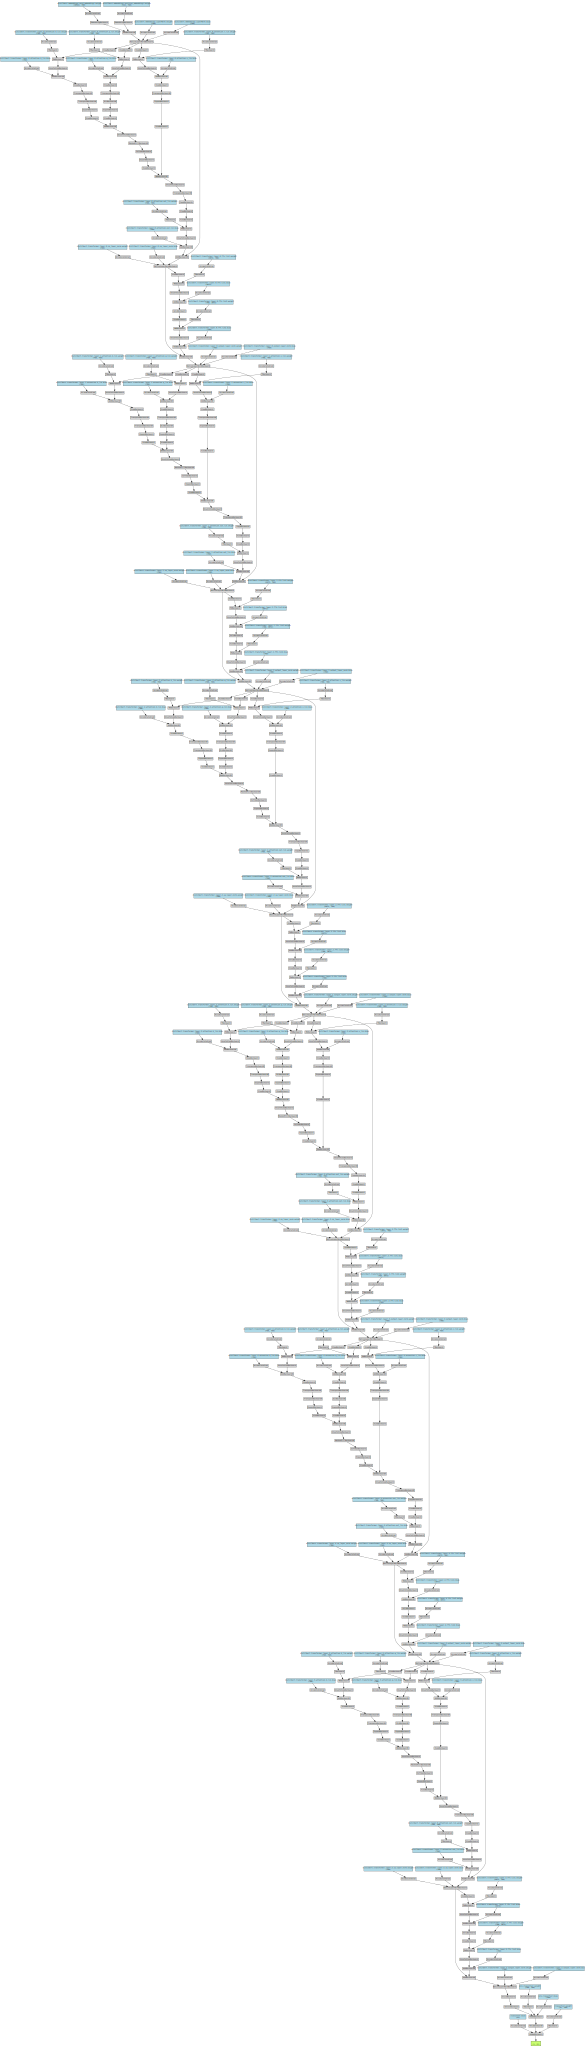

In [18]:
torchviz.make_dot(model_res.logits, params=dict(model.named_parameters()) 
                 # , show_attrs=True, show_saved=True
                 )

In [19]:
from ipywidgets import interact, widgets
from IPython.display import display, clear_output

text_widget = widgets.Text(
    value='men shoes',
    description='Query:',
    disabled=False
)
button_widget = widgets.Button(description="Classify!")

display(text_widget)
display(button_widget)


def predict(_):
    # replace by something useful
    
    query = text_widget.value
    
    res = tokenizer.encode_plus(query, return_tensors="pt",  padding="max_length", truncation=True)

    model_res = model(**res)

    topk = 5
    ps = torch.nn.functional.softmax(model_res.logits, dim=1)
    probs, classes = torch.topk(ps, topk, dim=1)
    probs = probs.tolist()
    classes = classes.tolist()

    output = map_class_to_label(probs, id2label_str, classes)
    display(f"Query: {query}")
    display(output)


button_widget.on_click(predict)

Text(value='men shoes', description='Query:')

Button(description='Classify!', style=ButtonStyle())

## Load dataset

In [20]:
dataset_path = '../artifacts/dataset_processed'

In [21]:
raw_datasets = datasets.load_from_disk(dataset_path)

In [22]:
columns = set(raw_datasets['test'].column_names ) - set(['text','label'])
columns

{'brand', 'item_id', 'item_name', 'main_image_id', 'node'}

In [23]:
set(raw_datasets.column_names )

{'test', 'train', 'valid'}

tokenize the entire dataset

In [24]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True, remove_columns=columns)

  0%|          | 0/73 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

In [25]:
tokenized_datasets['test'][0].keys()

dict_keys(['attention_mask', 'input_ids', 'label', 'text'])

In [26]:
# size of input length of model

In [27]:
len ( tokenized_datasets['test'][0]['input_ids'] )

512

create a subset of the test dataset.
feel free to use the full dataset if running on GPU

In [28]:
subset = tokenized_datasets["test"].num_rows

if torch.cuda.device_count() <=1:
    subset = 1_000

test_dataset = tokenized_datasets["test"].shuffle(42).select(range(subset)) 
test_dataset.set_format(type='torch' )

In [29]:
test_dataset

Dataset({
    features: ['attention_mask', 'input_ids', 'label', 'text'],
    num_rows: 24248
})

## Predicting on Test dataset

Predicting using the hugging face trainer object.     

Optimized Batch inference workflow

In [30]:
# Define test trainer
test_trainer = transformers.Trainer(model) 
# Make prediction
raw_predictions, raw_label_ids, raw_metrics = test_trainer.predict(test_dataset) 
# Preprocess raw predictions
y_pred = np.argmax(raw_predictions, axis=1)

The following columns in the test set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 24248
  Batch size = 32
/opt/conda/envs/pytorch/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [31]:
metric_accuracy = datasets.load_metric('accuracy')

In [32]:
metric_accuracy.compute(predictions = y_pred, references = test_dataset['label'])

{'accuracy': 0.9522022434839987}

In [33]:
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification

Predicting using the model `__call__` dunder method

need to make sure batches can fit in memory

In [34]:
model( input_ids = test_dataset['input_ids'][0:5].to(device) 
      , attention_mask = test_dataset['attention_mask'][0:5].to(device) )

SequenceClassifierOutput(loss=None, logits=tensor([[-4.1470, -2.7841, 11.6232, -3.2234, -3.9576, -3.7268, -3.7785, -2.4506,
         -2.6682, -2.8131, -4.3761, -5.5685, -2.4298, -1.7809, -2.5714, -1.8547,
         -3.4256, -3.4829, -4.2421, -1.6157, -3.0987, -1.3766, -2.0615, -2.8440,
         -3.7028, -3.7010, -1.6069, -3.4899, -2.4633, -3.7520, -3.0363],
        [-1.7733,  1.9384, -2.8429, -3.3398, -3.7641, -4.1361, -2.9453, -4.2689,
         -2.0359, -2.7621, -3.8082, -3.3728, -1.7605, -2.2357, -1.3469,  0.0881,
         -4.8683, -4.2775, -5.0739, -5.6989, -4.3355, -2.8119, -3.6114, -3.3428,
         -4.0086,  0.8103,  8.9297, -3.3323, -2.1714, -2.5704, -4.3707],
        [-4.1431, -2.8345, 11.5836, -3.2392, -3.9957, -3.7087, -3.6913, -2.4076,
         -2.5119, -2.8315, -4.4654, -5.5542, -2.2951, -1.7989, -2.5990, -1.8833,
         -3.5259, -3.4958, -4.3271, -1.7719, -3.1415, -1.4239, -2.1833, -2.8956,
         -3.7109, -3.6950, -1.5380, -3.4701, -2.5936, -3.7466, -3.0113],
        [

helper method that we can use to compute accuracy on our full dataset. 

We can't use HF Trainer object , because it is hard to use with the torcshcript model (future optimization)

In [35]:
def prediction_batch(model, dataset, device = device, batch_size = 8):
    l = len(dataset)
    all_y_preds = []
    # make sure model is in eval mode ; not computing gradients
    model.eval()
    
    # feed model to cpu/gpu device
    model = model.to(device)
    
    # iterate our dataset in batches
    for ndx in trange(0, l, batch_size):
        
        # take precomputed inut and attention masks
        input_ids = dataset['input_ids'][ndx:ndx+batch_size].to(device) 
        attention_mask = dataset['attention_mask'][ndx:ndx+batch_size].to(device) 
        
        with torch.no_grad():        
            res = model( input_ids = input_ids, attention_mask = attention_mask )
            
            # output of torchscript model doesn't have logits property 
            #logits = res.logits.detach().cpu().numpy()
            
            logits = res[0].detach().cpu().numpy()
            
            y_preds = np.argmax(logits, axis=1)
            
            all_y_preds.extend(y_preds)
    
    # accuracy on whole dataset
    accuracy = metric_accuracy.compute(predictions = all_y_preds, references = dataset['label'])
    
    return accuracy

In [36]:
prediction_batch(model,test_dataset.select(range(1_000)),device=device )

100%|██████████| 125/125 [00:17<00:00,  7.10it/s]


{'accuracy': 0.952}

## Predicting on single input

In [37]:
%%timeit -r 3 -n 5

device_current = 'cpu'
model.to(device_current)

model( input_ids =res['input_ids'].to(device_current)
      , attention_mask =res['attention_mask'].to(device_current) )

118 ms ± 11.4 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [38]:
%%timeit -r 3 -n 5
device_current = 'cuda'
model.to(device_current)

model( input_ids =res['input_ids'].to(device_current)
      , attention_mask =res['attention_mask'].to(device_current) )

20.8 ms ± 3.13 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
